In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
!pip install pyod
from pyod.models.knn import KNN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=e1097b277ef91dbed025d2f1c38391f35bca6ddaacea369fb4cd9f89135c7af1
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [4]:
# Load the dataset
file_path = '/content/data01.csv'
data = pd.read_csv(file_path)

In [5]:
# Exploratory Data Analysis (EDA)
# Display basic information and summary statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

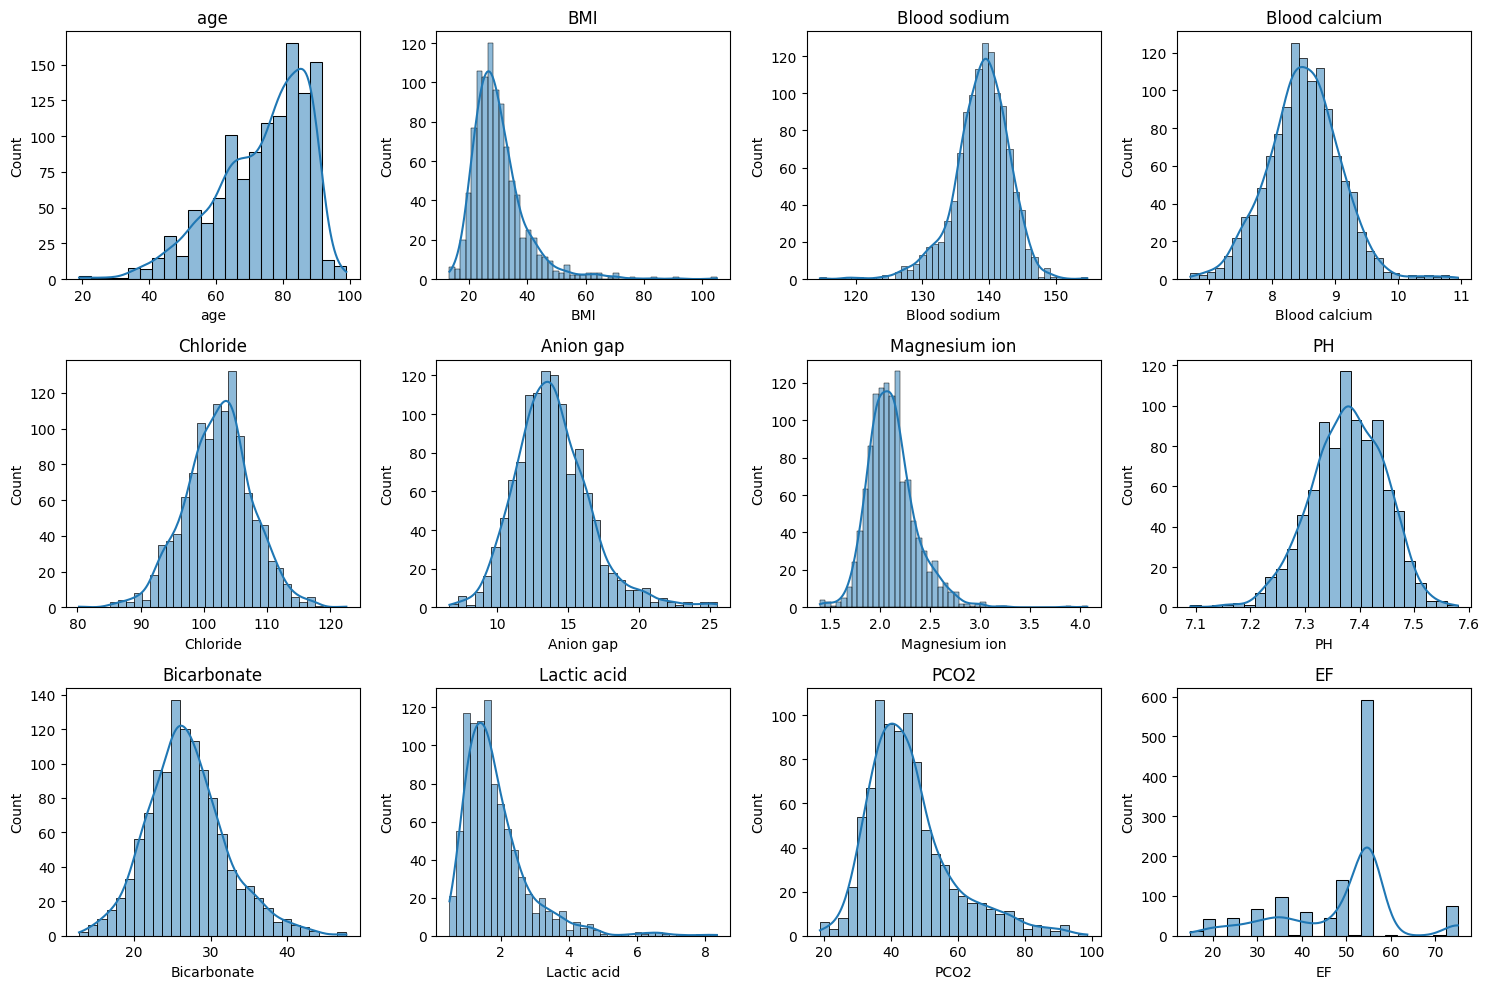

In [6]:
# Visualizing the distribution of some key numerical features using histograms
columns_to_visualize = ['age', 'BMI', 'Blood sodium', 'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
# Data Preprocessing
# Handling Missing Values
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data.drop(['group', 'ID'], axis=1))  # Dropping non-relevant columns

In [8]:
# Normalizing Numerical Features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)
data_preprocessed = pd.DataFrame(data_scaled, columns=data.columns[2:])  # Excluding 'group' and 'ID' from column names

In [9]:
# Building the Anomaly Detection Model using PyOD (Uncomment when PyOD is available)
# Splitting the dataset into train and test sets
X_train, X_test = train_test_split(data_preprocessed, test_size=0.2, random_state=42)

In [10]:
# Initializing and Training the KNN Model
knn_model = KNN(contamination=0.1)  # assuming approximately 10% of the data are outliers
knn_model.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [11]:
# Predicting Anomalies on the Test Set
y_test_pred = knn_model.predict(X_test)

In [12]:
# Counting detected anomalies
anomalies_count = sum(y_test_pred)
print(f"Number of detected anomalies in the test set: {anomalies_count}")

Number of detected anomalies in the test set: 32
